In [145]:
import pandas as pd
from sqlalchemy import create_engine
sqlstring='SELECT [Town/City], District, strftime("%Y",DateofTransfer)as Year FROM "table"  WHERE Cast(Year as int)== 2017 LIMIT 100'
#there's a / in a colum name which makes selecting the columns in this thing a pita
csv_database = create_engine('sqlite:///csv_database.db')
df = pd.read_sql_query(sqlstring, csv_database)
#df=df.set_index('Town/City')

#print(df)
#print(df.iloc[3])
#print(df.loc[:,['Price','District','DateofTransfer']])
#WHERE date(DateofTransfer) == date(1995-12-21)

In [60]:

londists=list(map(clean_string,set(df.loc['LONDON',"District"].values)))

In [125]:
cleangeolocations.get('CLACTONONSEA')

(51.78967, 1.1559700000000002)

In [146]:
df

Town/City                    District  Year
0            EASTLEIGH                   EASTLEIGH  2017
1          FARNBOROUGH                    RUSHMOOR  2017
2          SOUTHAMPTON                   EASTLEIGH  2017
3          FARNBOROUGH                    RUSHMOOR  2017
4          SOUTHAMPTON                 SOUTHAMPTON  2017
5              NEWBURY       BASINGSTOKE AND DEANE  2017
6              FAREHAM                  WINCHESTER  2017
7            EASTLEIGH                   EASTLEIGH  2017
8                 HULL  CITY OF KINGSTON UPON HULL  2017
9                 HULL  CITY OF KINGSTON UPON HULL  2017
10           DRIFFIELD    EAST RIDING OF YORKSHIRE  2017
11            HASTINGS                    HASTINGS  2017
12            HASTINGS                    HASTINGS  2017
13            HASTINGS                    HASTINGS  2017
14            HASTINGS                    HASTINGS  2017
15            HASTINGS                    HASTINGS  2017
16            HASTINGS                    HASTINGS  2017
17            HASTINGS                    HASTINGS  2017
18  ST LEONARDS-ON-SEA                    HASTINGS  2017
19            HASTINGS                    HASTINGS  2017
20  ST LEONARDS-ON-SEA                    HASTINGS  2017
21            HASTINGS                    HASTINGS  2017
22            HASTINGS                    HASTINGS  2017
23            HASTINGS                    HASTINGS  2017
24            HASTINGS                    HASTINGS  2017
25            HASTINGS                    HASTINGS  2017
26  ST LEONARDS-ON-SEA                    HASTINGS  2017
27  ST LEONARDS-ON-SEA                    HASTINGS  2017
28            HASTINGS                    HASTINGS  2017
29            HASTINGS                    HASTINGS  2017
..                 ...                         ...   ...
70         SOUTHAMPTON                  NEW FOREST  2017
71         SOUTHAMPTON                 SOUTHAMPTON  2017
72       WATERLOOVILLE                  WINCHESTER  2017
73             VENTNOR               ISLE OF WIGHT  2017
74             FAREHAM                     FAREHAM  2017
75          WINCHESTER                  WINCHESTER  2017
76               FLEET                        HART  2017
77         SOUTHAMPTON                 SOUTHAMPTON  2017
78         SOUTHAMPTON                 SOUTHAMPTON  2017
79         SOUTHAMPTON                 SOUTHAMPTON  2017
80           EASTLEIGH                   EASTLEIGH  2017
81             GOSPORT                     GOSPORT  2017
82             ANDOVER                 TEST VALLEY  2017
83         SOUTHAMPTON                 SOUTHAMPTON  2017
84               FLEET                        HART  2017
85           EASTLEIGH                   EASTLEIGH  2017
86               FLEET                        HART  2017
87          WINCHESTER                  WINCHESTER  2017
88         BOURNEMOUTH                 BOURNEMOUTH  2017
89              ROMSEY                 TEST VALLEY  2017
90             YATELEY                        HART  2017
91       WATERLOOVILLE                  WINCHESTER  2017
92         SOUTHAMPTON                 SOUTHAMPTON  2017
93         SOUTHAMPTON                 SOUTHAMPTON  2017
94             READING       BASINGSTOKE AND DEANE  2017
95               FLEET                        HART  2017
96           EASTLEIGH                   EASTLEIGH  2017
97         SOUTHAMPTON                     FAREHAM  2017
98             ANDOVER                 TEST VALLEY  2017
99           EASTLEIGH                   EASTLEIGH  2017

[100 rows x 3 columns]

In [126]:
import pickle
geolocations = pickle.load( open( "cities.pkl", "rb" ) )
cleangeolocations = pickle.load( open( "citiesnopunc.pkl", "rb" ) )

In [127]:
#The City and District columns are not consistent. In large cities district means the district within that city, in small towns district means county, We want the most accurate of the two this 
#methos picks district where that is more accurate.
import string as stringlib


def clean_string(string):
 for char in stringlib.punctuation:
     string = string.replace(char,'').replace(' ', '')
 return string.upper()



In [136]:
def cit_dist(df): 
    return (list(map(clean_string,df['Town/City'].values)), list(map(clean_string,df['District'].values)))

cit_dist(df)

(['KETTERING',
  'PRESTON',
  'BEDFORD',
  'ANDOVER',
  'ILFORD',
  'PENZANCE',
  'BUCKINGHAM',
  'LINCOLN',
  'IPSWICH',
  'COVENTRY',
  'ILFORD',
  'LONDON',
  'WARRINGTON',
  'POOLE',
  'NOTTINGHAM',
  'ILKLEY',
  'HULL',
  'PRESTATYN',
  'CLACTONONSEA',
  'WAREHAM',
  'REDRUTH',
  'WREXHAM',
  'BIGGLESWADE',
  'STNEOTS',
  'GUILDFORD',
  'OXFORD',
  'NEWMARKET',
  'BOGNORREGIS',
  'BIRMINGHAM',
  'RUNCORN',
  'BRISTOL',
  'BARNSLEY',
  'CAMBRIDGE',
  'WESTCLIFFONSEA',
  'NORWICH',
  'WARRINGTON',
  'LONDON',
  'HASLEMERE',
  'MACCLESFIELD',
  'CARNFORTH',
  'OTLEY',
  'ISLEWORTH',
  'RHYL',
  'OXFORD',
  'IVYBRIDGE',
  'CROYDON',
  'COLCHESTER',
  'SHEFFIELD',
  'BASINGSTOKE',
  'PERSHORE',
  'EPSOM',
  'EXETER',
  'EASTMOLESEY',
  'ILKESTON',
  'STUDLEY',
  'LONDON',
  'HUDDERSFIELD',
  'NORTHSHIELDS',
  'STOCKTONONTEES',
  'BRISTOL',
  'MORDEN',
  'BOURNEMOUTH',
  'GRAVESEND',
  'STRATFORDUPONAVON',
  'LONDON',
  'TOTNES',
  'COLCHESTER',
  'ASHBOURNE',
  'OLDHAM',
  'LEICESTER',

In [138]:

#takes a 2-tuple and returns the district if the city id london
def cleangeolocationslsp(city,district):
    if city != 'LONDON':
        return cleangeolocations.get(city)
    else:
        return cleangeolocations.get(district)

list(map(cleangeolocationslsp,cit_dist(df)[0],cit_dist(df)[1]))

[(52.39836, -0.7257100000000001),
 (51.71515, -1.93287),
 (52.2325, -0.44556),
 (51.20449, -1.4817799999999999),
 (51.55765, 0.07278),
 (50.12117, -5.53694),
 (51.99725, -0.9751200000000001),
 (53.2357, -0.5352),
 (52.05917, 1.15545),
 (52.41667, -1.5),
 (51.55765, 0.07278),
 (51.53333, -0.08333),
 (52.179429999999996, -0.69622),
 (50.71159, -1.98347),
 (52.96666999999999, -1.15),
 (53.920159999999996, -1.82348),
 (53.7401, -0.33129000000000003),
 (53.33464, -3.4051400000000003),
 (51.78967, 1.1559700000000002),
 (50.69188, -2.10888),
 (50.238640000000004, -5.22912),
 (53.046640000000004, -2.99132),
 (52.0786, -0.24536),
 (52.22676, -0.25891),
 (51.2371, -0.5677),
 (51.71338, -1.21446),
 (52.24778, 0.3848),
 (50.789559999999994, -0.6785800000000001),
 (52.48141999999999, -1.89983),
 (53.34174, -2.73124),
 (51.45, -2.6),
 (51.75266, -1.88579),
 (52.2325, 0.15836),
 (51.54424, 0.69179),
 (52.61781, 1.3646200000000002),
 (52.179429999999996, -0.69622),
 (51.5, -0.25),
 (51.50035, -0.32198

In [18]:
locations=df.iloc[:,0]
plotdata=locations.map(geolocations).tolist()
fplotdata=list(filter(lambda x:type(x)==tuple,plotdata))
print(len(plotdata))
print(len(fplotdata)-len(plotdata))

964695
-239947


In [99]:
cleanlocations=locations.map(clean_string)

cleanplotdata=cleanlocations.map(cleangeolocations).tolist()
cleanfplotdata=list(filter(lambda x:type(x)==tuple,cleanplotdata))
print(len(cleanplotdata))
print(len(cleanfplotdata)-len(cleanplotdata))


964695
0


In [100]:
import numpy as np
geofailindices=(np.where(pd.isnull(plotdata))[0]).tolist()
print(len(set(locations.loc[geofailindices])))

cleangeofailindices=(np.where(pd.isnull(cleanplotdata))[0]).tolist()
print(len(set(cleanlocations.loc[cleangeofailindices])))

33
0


In [9]:
#print(set(locations.loc[geofailindices]))
print(set(cleanlocations.loc[cleangeofailindices]))

set()


In [69]:
df.Price.values.max()

12400000

In [101]:
y  =[cpd[0] for cpd in cleanplotdata]
x=[cpd[1] for cpd in cleanplotdata]

In [43]:
type(x)

list

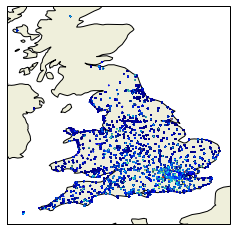

In [102]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors


land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])


cmap = plt.cm.jet
norm = matplotlib.colors.LogNorm(vmin=50000,vmax=740000)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.add_feature(land_50m)
ax.scatter(x,y,color=cmap(norm(df.Price.values)),s=0.3, zorder=10)

plt.show()

In [84]:

norm(2000000)

0.3692022263450835